In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

In [2]:
N=4096
Ns=N//4
i_s,j_s=1*Ns//128, 3*N//128
data = np.random.normal(0,1,N)**2
#data=np.arange(N)

In [3]:
def zero_firstlast(x):
    x[0]=0
    x[-1]=0
    return x

In [4]:
## chunked baseband conversion
chunk1 = irfft(zero_firstlast(rfft(data[:3*Ns])[i_s:j_s]))
chunk2 = irfft(zero_firstlast(rfft(data[Ns:])[i_s:j_s]))
chunked = np.hstack((chunk1[58:2*58],chunk2[58:2*58]))
## full size
full = irfft(zero_firstlast(rfft(data)[i_s*4//3+1:j_s*4//3+1]))
full = full[len(full)//4+1:3*len(full)//4]

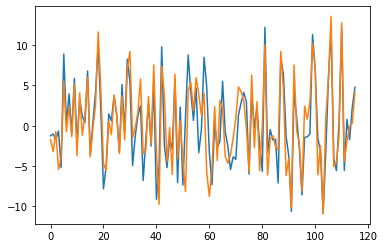

In [5]:
plt.plot(chunked)
plt.plot(full)

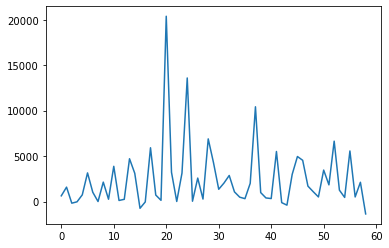

In [6]:
plt.plot(np.real(rfft(chunked)*np.conj(rfft(full))))

(50.0, 80.0)

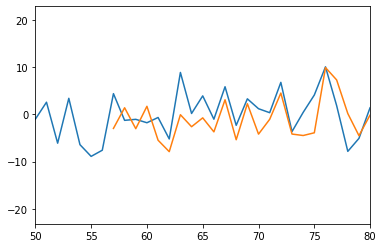

In [7]:
plt.plot(np.arange(174),chunk1)
plt.plot(np.arange(174)+174/3-1,chunk2)
plt.xlim(50,80)

In [8]:
174//3

58